# Practical session ML: Unsupervised learning

Import the necessary modules.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import random
from sklearn import datasets, cluster, neighbors, metrics, tree, svm, mixture
from itertools import cycle, islice

# colors to be used in plots
colors = np.array(['r', 'g', 'b', 'y', 'c'])

We will use some artificial data sets to compare the results of different clustering algorithms.

# Part 1: Concentric Circles dataset

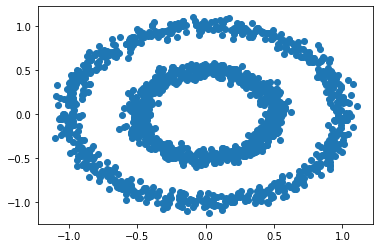

In [2]:
# generate the data
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)

# visualize the data
X, y = noisy_circles
plt.scatter(X[:,0], X[:,1])
plt.show()

In [3]:
# function for applying clustering algorithm and visualising the result
def apply(X, algo):
    algo.fit(X)
    labels = algo.labels_.astype(np.int)
    plt.scatter(X[:, 0], X[:, 1], color=colors[labels])
    plt.show()
    return labels

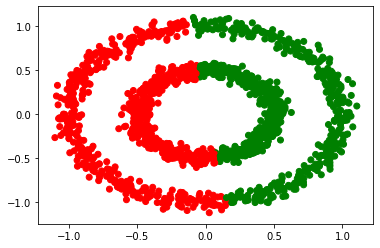

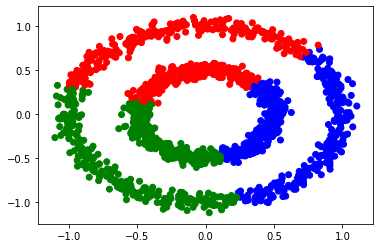

array([1, 1, 0, ..., 0, 2, 0])

In [4]:
# try K-means clustering -> https://scikit-learn.org/stable/modules/clustering.html#k-means
apply(X, cluster.KMeans(n_clusters=2, random_state=8))
# Adding some more examples of k-means clustering
apply(X, cluster.KMeans(n_clusters=3, random_state=8))

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion. We still need to be cautious: Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. Inertia is also not normalized, so we need to be carefull for high-dimensional spaces, cause the Euclidean distance will become inflated! (-> More info search for the Principal component analysis PCA to reduce dimensions.)

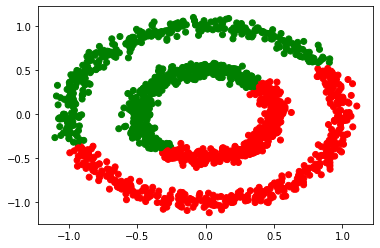

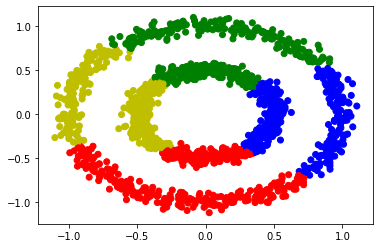

array([0, 3, 1, ..., 1, 2, 1])

In [5]:
# Agglomerative clustering -> https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering 
apply(X, cluster.AgglomerativeClustering(n_clusters=2))
apply(X, cluster.AgglomerativeClustering(n_clusters=4))

Agglomerative Clustering is a from of Hierarchical clustering, these sorts of algorithms build clusters by merging and splitting them. These are most of the time represented as trees. (-> More info: https://en.wikipedia.org/wiki/Hierarchical_clustering)
There are also different types of linkage criteria that are used in those algorithms, see Ex1.

## Exercise 1

Compare the results of Agglomerative Clustering using complete, single, and Ward's linkage. 

**Question:** Can you explain the differences in the results? 

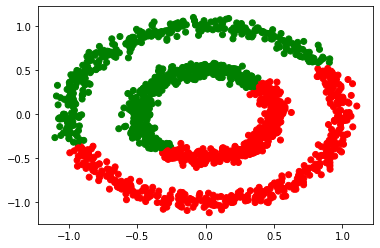

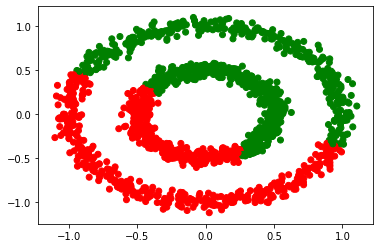

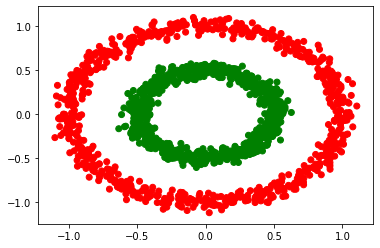

array([0, 0, 1, ..., 0, 0, 0])

In [7]:
apply(X, cluster.AgglomerativeClustering(n_clusters=2)) #default is ward
apply(X, cluster.AgglomerativeClustering(n_clusters=2, linkage="complete"))
apply(X, cluster.AgglomerativeClustering(n_clusters=2, linkage="single"))

Three different types of linkage:
    1 Ward: minimizes the variance of the clusters being merged.
    2 Complere: uses the maximum distances between all observations of the two sets.
    3 Single: uses the minimum of the distances between all observations of the two sets.
    
Single linkage has the best performance here, because there is a larger gap between the two circles. The cicles are very dense, so this is why different parts of the same circle are more likely to be merged together whe we consider the minimal distance between the clusters (like single linkage).

## Exercise 2

Try out Spectral clustering and DBSCAN on the same dataset.

**Question:** Do the default parameter values for DBSCAN work? Why/why not? If not, which parameter values do work, and why? Tip: check out the documentation for DBSCAN at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN.

/Users/Victor/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


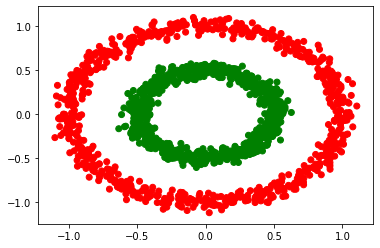

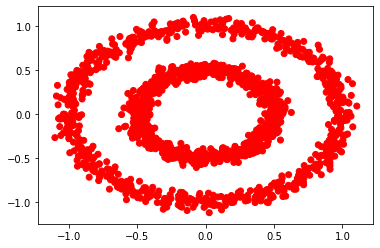

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
apply(X, cluster.SpectralClustering(n_clusters=2, affinity="nearest_neighbors"))
apply(X, cluster.DBSCAN())

We see here that the default parameters of this function don't work! 
We need to change the eps parameter for it to work. 

The default value for eps (0.5) doesn't work. eps is the maximum distance between two samples for one to be considered as in the neighborhood of the other. Since all points are between [-1,-1] and [1,1], this value is too large. Setting eps to 0.2 gives better results.

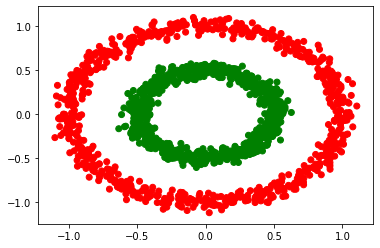

array([0, 0, 1, ..., 0, 0, 0])

In [12]:
apply(X, cluster.DBSCAN(eps=0.2)) # new eps parameter

# Part 2: Mouse dataset

Compare some different clustering algorithms on the mouse data set, which you can find in the file `mouse.txt` bundled with this practical session. The data set itself is easy to load into Python:

In [19]:
with open('mouse.txt') as file:
    mouse = np.loadtxt(file)

Plot the data.

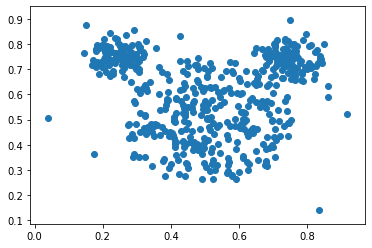

In [20]:
plt.scatter(mouse[:, 0], mouse[:, 1])
plt.show()

## Exercise 1: basic clustering
Now compare the same clustering algorithms that we used before on `mouse`:
- KMeans
- Spectral Clustering
- Agglomerative Clustering
- DBSCAN

See the scikit-learn API at http://scikit-learn.org/stable/modules/classes.html.

**Question:** What are the differences in the results now? Can you explain them?

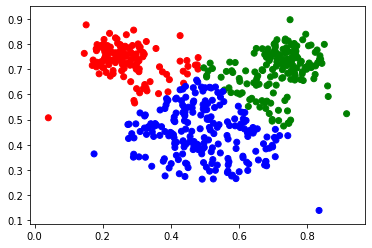

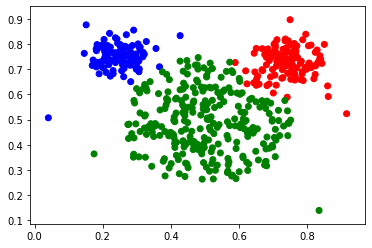

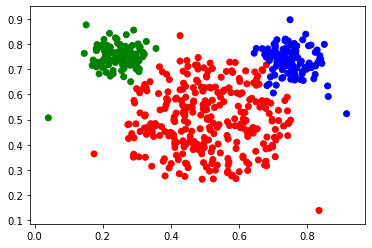

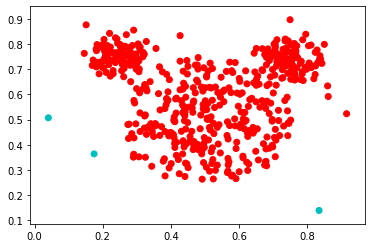

In [21]:
resKM = apply(mouse, cluster.KMeans(n_clusters=3, random_state=8))
resSP = apply(mouse, cluster.SpectralClustering(n_clusters=3, affinity="nearest_neighbors"))
resAC = apply(mouse, cluster.AgglomerativeClustering(n_clusters=3))
resDB = apply(mouse, cluster.DBSCAN(eps=.1))

KMeans doesn't perform terribly, but there is some overlap (the smaller clusters take up part of the larger, center one). This is because KMeans assumes different clusters are of similar size and density. Spectral clustering and agglomerative clustering perform better, since they are better suited for clusters of varying size and/or density. DBSCAN performs very bad, as it is too sensitive to the outliers and the differences in density.

## Exercise 2 (extra): GMM
Now apply a Gaussian Mixture to the dataset. Note that this algorithm doesn't work exactly like the ones we've seen before: in this case, the clustering is "fuzzy". An interesting source to start from is https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#sphx-glr-auto-examples-mixture-plot-gmm-pdf-py.

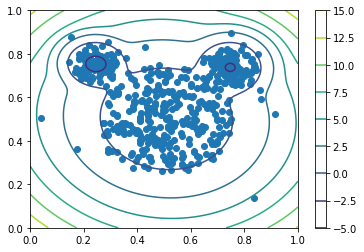

[[0.50883596 0.50097749]
 [0.24534817 0.75373462]
 [0.74764445 0.73813198]]


In [22]:
gm = mixture.GaussianMixture(n_components=3, covariance_type="full")
gm.fit(mouse)

# Source: https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#sphx-glr-auto-examples-mixture-plot-gmm-pdf-py
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
XX = np.array([X.flatten(), Y.flatten()]).T
Z = -gm.score_samples(XX)
Z = Z.reshape(X.shape)
CS = plt.contour(X, Y, Z)
plt.colorbar(CS)
plt.scatter(mouse[:, 0], mouse[:, 1])
plt.show()

print(gm.means_)

# Part 3: Evaluation of clustering results

## Exercise 1

Plot the SSE for different values of $k$ on the mouse dataset.

**Question:** Can you see on the plot which value of $k$ is best?

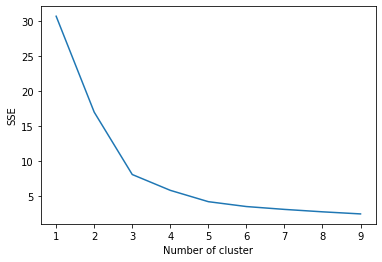

In [26]:
sse = {}
for k in range(1, 10):
    kmeans = cluster.KMeans(n_clusters=k, max_iter=1000).fit(mouse)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

We can see a sort of knee around the 3

## Exercise 2

One way to validate the quality of clustering on a dataset is to compute the distance matrix between samples, and compare it to the incidence matrix resulting from clustering.

We first compute a distance matrix on the mouse data, and visualise it in a heatmap:


In [27]:
distance_matrix = metrics.pairwise.euclidean_distances(mouse,mouse)

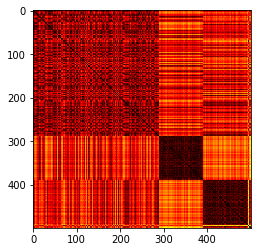

In [28]:
plt.imshow(distance_matrix, cmap='hot', interpolation='nearest')
plt.show()

Here is a piece of code that you can use to compute the incidence matrix corresponding to some clustering result, and plot it afterwards:

In [29]:
def compute_incidence(clustering_array):
    x = clustering_array
    X = np.tile(x, (x.shape[0], 1))
    Xt = X.transpose()
    incidence = X == Xt
    return(incidence)

incidence_matrix = compute_incidence(np.array([0,1,0,0,1,1,1,0]))

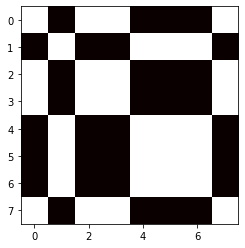

In [30]:
plt.imshow(incidence_matrix, cmap='hot', interpolation='nearest')
plt.show()

Exercise: Compute the incidence matrices corresponding to the different clustering methods that we used previousely (agglomerative, KMeans, spectral embedding, DBSCAN), and compare them to the original distances in the mouse dataset.

*Tip: to compare two matrices, you can first flatten them into simple vectors and then compute a correlation score between them.*

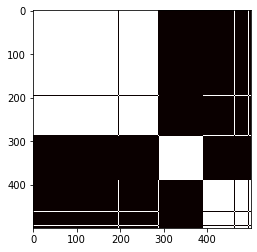

In [31]:
incidence_matrix = compute_incidence(resAC)
plt.imshow(incidence_matrix, cmap='hot', interpolation='nearest')
plt.show()

Here i used the compute_incidence fucntion, it computes the incidence matrix corresponding to the agglomerative clustering results on the mouse dataset. 

In [ ]:
flat_distances = distance_matrix.flatten()
flat_incidence = incidence_matrix.flatten()
pearson = np.corrcoef(flat_distances,flat_incidence)
print("Pearson correlation for agglomerative clustering: ", pearson[0,1])


## Exercise 3

Use the Silhouette Score to choose the optimal number of clusters in Spectral Clustering.

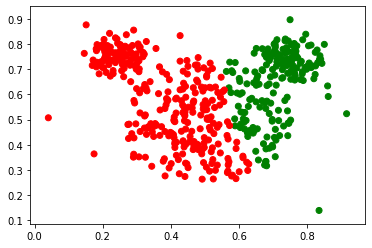

Score of the spectral clustering with 2 clusters: 0.4073726636767643


In [23]:
labelsSP2 = apply(mouse, cluster.SpectralClustering(n_clusters=2, affinity="nearest_neighbors"))
scoreSP2 = metrics.silhouette_score(mouse, labelsSP2, metric='euclidean')
print("Score of the spectral clustering with 2 clusters:", scoreSP2)

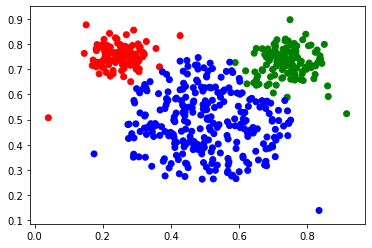

Score of the spectral clustering with 3 clusters: 0.4766982422775556


In [24]:
labelsSP3 = apply(mouse, cluster.SpectralClustering(n_clusters=3, affinity="nearest_neighbors"))
scoreSP3 = metrics.silhouette_score(mouse, labelsSP3, metric='euclidean')
print("Score of the spectral clustering with 3 clusters:", scoreSP3)

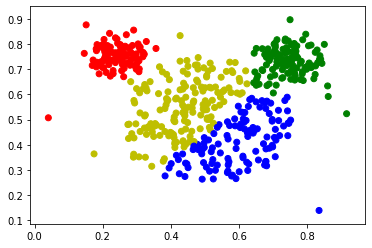

Score of the spectral clustering with 4 clusters:  0.4588535643383346


In [25]:
labelsSP4 = apply(mouse, cluster.SpectralClustering(n_clusters=4, affinity="nearest_neighbors"))
scoreSP4 = metrics.silhouette_score(mouse, labelsSP4, metric='euclidean')
print("Score of the spectral clustering with 4 clusters: ", scoreSP4)